In [73]:
import pandas as pd
import numpy as np
import os


#### marging the months

In [103]:
files = [file for file in os.listdir('./Sales_Data')]

all_month_data = pd.DataFrame()
    
for file in files:
    df = pd.read_csv("./Sales_Data/"+ file)
    all_month_data = pd.concat([all_month_data , df]) 
all_month_data.to_csv("all_data.csv" , index=False)


##### read in the updated  file

In [213]:
all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### cleaning the data

#### removing the nan columns

In [214]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how= 'any')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### add month column

In [218]:
all_data['month'] = all_data['Order Date'].str[0:2] 
all_data

C:\Users\user\AppData\Local\Temp/ipykernel_8832/2980670094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month'] = all_data['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


### converting columns into coorect datatype

In [127]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float

C:\Users\user\AppData\Local\Temp/ipykernel_8832/3571501246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
C:\Users\user\AppData\Local\Temp/ipykernel_8832/3571501246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float


#### find extra headings  and remove them  

In [131]:
all_data = all_data[all_data['Quantity Ordered']!='Quantity Ordered']
all_data.head(520)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215",04,11.99
518,177054,Apple Airpods Headphones,1,150.00,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301",04,150.00
520,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301",04,14.95
521,177056,Flatscreen TV,1,300.00,04/20/19 23:52,"180 9th St, San Francisco, CA 94016",04,300.00


### add a sales column

In [203]:
all_data['sales'] = all_data['Quantity Ordered']  * all_data['Price Each']
all_data.inplace = True

### what was the best month for sale

In [142]:
result = all_data.groupby('month').sum()

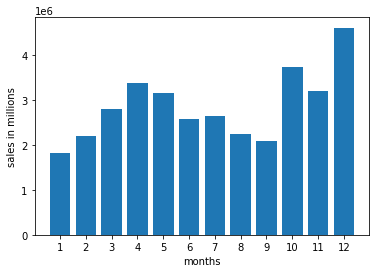

In [149]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,result['sales'])
plt.xticks(months)
plt.ylabel('sales in millions')
plt.xlabel('months')
plt.show()

### which city has the best sales

In [159]:
city = pd.DataFrame(all_data.groupby('Purchase Address').sum())
city.sort_values('sales', ascending=False)

,Quantity Ordered,Price Each,sales
Purchase Address,,,
"668 Park St, San Francisco, CA 94016",4,2679.99,4379.99
"795 1st St, Atlanta, GA 30301",3,4100.00,4100.00
"391 1st St, Seattle, WA 98101",3,4100.00,4100.00
"10 1st St, San Francisco, CA 94016",3,4000.00,4000.00
"731 11th St, New York City, NY 10001",6,2219.88,3919.88
...,...,...,...
"873 Hill St, San Francisco, CA 94016",1,2.99,2.99
"533 Church St, Austin, TX 73301",1,2.99,2.99
"873 Forest St, Boston, MA 02215",1,2.99,2.99


### what time is most like for advertising and selling

In [179]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [185]:
all_data['hours'] = all_data['Order Date'].dt.hour
all_data['minutes'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hours,minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,9,27


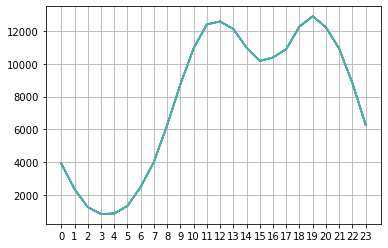

In [192]:
hours = [hours for hours , df in all_data.groupby('hours')]
plt.plot(hours,all_data.groupby(['hours']).count())
plt.xticks(hours)

plt.grid()

### what products are sold the most

In [195]:
pro_sales =all_data.groupby('Product').sum()
pro_sales.sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,sales,hours,minutes
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,347094.15,312529,634442
Wired Headphones,20557,226395.18,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,1132424.50,107540,219948
iPhone,6849,4789400.00,4794300.00,98657,201688


In [207]:
all_data.to_csv("final_data.csv" , index=False)